# CS5228 Assignment 1a - EDA & DBSCAN

Hello everyone, this assignment notebook covers Exploratory Data Analysis (EDA) and DBSCAN. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A1a_YourName_YourNUSNETID.ipynb** (e.g., **A1a_BobSmith_e12345678.ipynb**) before submission! Failure to do so will yield a penalty of 1 Point.
* Remember to rename and save the script file *A1a_script.py* as **A1a_YourName_YourNUSNETID.py** (e.g., **A1a_BobSmith_e12345678.py**) before submission! Failure to do so will yield a penalty of 1 Point.
* Submission deadline is Sep 11, 11.59 pm (together with A1b). Late submissions will be penalized by 10% for each additional day.

Please also add your nusnet and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'E0674520'
nusnet_id = 'E0674520'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Data Cleaning & Exploratory Data Analysis (EDA) (30 Points)**
    * 1.1 Preparing a Real-World Dataset for Analysis (22 Points)
        * 1.1 a) Removing "Dirty" Records (6 Points)
        * 1.1 b) Handling Missing (NaN) Values (6 Points)
        * 1.1 c) Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)
        * 1.1 d) Handling of Categorical Attributes (4 Points)
    * 1.2 Basic Facts about a Real-World Dataset (8 Points)
* **2 Identifying Noise Using Clustering (20 Points)**
    * 2.1 Implementing DBSCAN for Noise Detection (10 Points)
        * 2.1 a) Compute Core Points (5 Points)
        * 2.2 b) Compute Noise Points (5 Points)
    * 2.2 Questions about DBSCAN (10 Points)
        * 2.2 a) `get_noise_dbscan()` vs. `sklearn.cluster.DBSCAN` (2 Points)
        * 2.2 b) Basic Data Understanding with DBSCAN (3 Points)
        * 2.2 c) Effects of Data Manipulation on DBSCAN Results (2 Points)
        * 2.2 d) Identifying Noise/Outliers with Clustering beyond DBSCAN (3 Points)        

## Setting up the Notebook

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A1a_script.py`, you also need to edit the import statement below accordingly.

In [3]:
from A1a_mayuan_e0674520 import get_noise_dbscan
#from A1a_BobSmith_e12345678 import get_noise_dbscan # <-- you well need to rename this accordingly

----------------

# 1 Data Cleaning & Explorative Data Analysis (EDA)

### 1.1 Cleaning a Real-World Dataset (XX Points)

For the following tasks, we consider a dataset containing information 20,000 past resale transactions of condo flats. Each record (i.e., data samples) consists of 12 attributes. The following **data description** list all attributes together with a brief description of each attribute's data type / domain:

* **transaction_id**: Unique ID of the resale transactions; an 8-digit integer number uniquely assigned to each transaction.
* **url**: Unique link to a website documenting this transaction as a string value.
* **name**: The name of the condo as a string value (e.g., "estella gardens", "eedon green").
* **type**: The type of condo as string value (e.g., "condominium", "apartment").
* **postal_district**: The postal district the condo is located in as integer value; Singapore has 28 postal districts: 1, 2, ..., 28 (cf. [here](https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm)).
* **subzone**: The subzone the condo is located in as a string value.
* **planning_area**: The planning area the condo is located in as a string value.
* **region**: The region the condo is located in as a string value.
* **date_of_sale**: The date (month & year) of the transaction as a string value (e.g., "mar-19", "oct-20").
* **area_sqft**: The size of the condo flat in square feet as a positive integer value.
* **floor_level**: The range of floors in which the flat is located in the condo as string value (e.g., "06 to 10", "11 to 15").
* **eco_category**: The eco category of the condo as a single-character string value (e.g., "A", "B", "C", "D").
* **price**: Resale price of the condo flat in Singapore Dollar as an integer value.

Additional information: Singapore has 55 panning areas; each planning area is further split into multiple subzones (if you are interested, you can check out the corresponding [Wikipedia article](https://en.wikipedia.org/wiki/List_of_places_in_Singapore)).

**Important:** In each of the following subtask 1.1 a)-c) we use a slightly different version of the dataset. This allows you to focus on the specific aspects of data cleaning / data preprocessing addresses in the respective subtask. In practice, of course, there would be only one dataset containing all the different issues (e.g., "dirty" records, missing data, etc.) at once.

#### 1.1 a) Removing "Dirty" Records (6 Points)

We argued in the lecture that almost all real-world datasets contain some form of noise that might negatively affect any applied data analysis. The very first -- and in some sense -- easiest way to identify noise is to check if all data confirms with the data description. The following code cell shows a snippet of the dataset which you will be looking at in this subtask.

In [4]:
df_condo_dirty = pd.read_csv('data/a1-condo-resale-dirty.csv')

df_condo_dirty.head()

,transaction_id,name,street,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,price
0,82953057,treasure at tampines,tampines lane,condominium,18,tampines east,tampines,jul-19,818,06 to 10,1024000
1,17139360,parc central residences,tampines street 86,executive condominium,18,tampines west,tampines,apr-21,990,11 to 15,1187000
2,22288515,martina mansions,bukit timah road,apartment,10,nassim,tanglin,jan-20,1259,01 to 05,2300000
3,80737365,the pier at robertson,mohamed sultan road,apartment,9,robertson quay,singapore river,jun-19,1044,06 to 10,2400000
4,83154310,rivercove residences,anchorvale lane,executive condominium,19,anchorvale,sengkang,oct-18,1184,16 to 20,1239100


If you check the dataset against its description, you will notice that many records are "dirty". We define a record as "dirty" if it does not adhere to the given data description (see above). Such records are not guaranteed to be valid and should therefore not be used for any analysis.

**Identify at least 3 causes of "dirty" records and remove all corresponding records from the dataset!** Please provide your answer in the markdown cell below. Additional (simplifying) guidelines:

* Ignore missing (`NaN`) values -- that is, a record containing one or more missing values does not make this record dirty. We look at missing values in a subsequent task as their handling depends on the data analysis to be performed.
* Ignore the correctness of string values -- that is, we do not expect you to check, e.g., if a street name contains a typo or a planning area is indeed one of the existing 55 planning areas in Singapore

**Your Answer:**

1. Duplicated Records

    there are many duplicated records if excluding the transaction_id (with transaction_id has 336 duplicated records, without transaction_id has 630)

    ```
    df_condo_dirty[df_condo_dirty.iloc[:,1:].duplicated(keep=False)].sort_values("name")
    ```

2. wrong Attribute Types 
   
    postal_district > 0
    
    postal_district should be considered as categorical (Nominal) but pandas read as int64

    ```
    df_condo_dirty.dtypes
    ```
3. Incorrect data

    area_sqft should be larger than zero but minimum values is -1 and 0

    ```
    df_condo_dirty.min()
    ```
4.  Outliers (potential)

    there is an excessive large area_sqft / price sample but rational, because the larger the house with greater price

    ```
    df_condo_dirty.boxplot(column=['area_sqft'])  
    df_condo_dirty.boxplot(column=['price'])
    ```

Use the code cell below to actually implement your steps for removing the "dirty" records. The results should back up your answer above. Feel free to split the cell into multiple code cells to improve organization (not a must, though).

**Important:** Avoid using loops in the parts of the code you have to complete -- `pandas` is really powerful and should be your best friend here. If you use loops but the results are correct, there will be some minor deduction of points. But note that it's of course better to have a working solution using loops than having no solution at all.

In [8]:
# We first create a copy of the dataset and use this one to clean the data.
df_cleaned = df_condo_dirty.copy()

#########################################################################################
### Your code starts here ###############################################################
print(f"original data size = {df_cleaned.shape}")
""" removing duplicates (excluding transaction_id)
"""
print('='*5+' removing duplicates '+'='*5)
duplicates = df_condo_dirty[df_condo_dirty.iloc[:,1:].duplicated(keep='first')].sort_values("name")
print(f"number of duplicates(keep first) = {int(duplicates.shape[0])}")
df_cleaned = df_cleaned[~df_cleaned.iloc[:,1:].duplicated(keep='first')]
print(f"duplicates removed data size = {df_cleaned.shape}")

"""wrong Attribute Types
"""
print('='*5+' changing Attribute Types '+'='*5)
df_cleaned['postal_district'] = df_cleaned['postal_district'].astype(str)
print(f"type of postal_district: {df_cleaned['postal_district'].dtypes}")

""" removing incorrect data
"""
df_cleaned = df_cleaned[df_cleaned["area_sqft"] > 0]
print(f"incorrect data removed data size = {df_cleaned.shape}")

""" remove known outliers 
"""
# print('='*5+' remove known outliers '+'='*5)
# Q1 = df_condo_dirty[df_condo_dirty["area_sqft"]>0]["area_sqft"].quantile(0.01)
# Q3 = df_condo_dirty[df_condo_dirty["area_sqft"]>0]["area_sqft"].quantile(0.99)
# IQR = Q3 - Q1
# df_condo_dirty[~((df_condo_dirty[["area_sqft"]] < (Q1 - 1.5 * IQR)) | (df_condo_dirty[["area_sqft"]] > (Q3 + 1.5 * IQR))).any(axis=1)].shape#.boxplot(column=['area_sqft'])

### Your code ends here #################################################################
#########################################################################################

print('After cleaning, there are now {} records.'.format(df_cleaned.shape[0]))

original data size = (20000, 11)
===== removing duplicates =====
number of duplicates(keep first) = 321
duplicates removed data size = (19679, 11)
===== changing Attribute Types =====
type of postal_district: object
incorrect data removed data size = (18647, 11)
After cleaning, there are now 18647 records.


**Important:** We do not provide an expected output regarding the number of records after the cleaning step as there is some wiggle room regarding the performed steps which would affect this result. As such, even if two solutions are correct, they do not necessarily yield the same number of records.

#### 1.1 b) Handling Missing (NaN) Values (6 Points)

Many to most traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our condo resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [26]:
df_condo_nan = pd.read_csv('data/a1-condo-resale-nan.csv')

df_condo_nan.head()

,transaction_id,url,name,street,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,95103981,http://condo-sg.com/alex-residences-3570,alex residences,alexandra view,apartment,3,redhill,bukit merah,oct-21,883,01 to 05,A,1595880.0
1,69374014,http://condo-sg.com/the-rivervale-4160,the rivervale,rivervale link,executive condominium,19,rivervale,sengkang,jul-17,1313,06 to 10,A,900000.0
2,54377409,http://condo-sg.com/parc-palais-5143,parc palais,hume avenue,condominium,21,hillview,bukit batok,sep-21,1389,01 to 05,A,1810000.0
3,64749050,NaN,hedges park condominium,flora drive,condominium,17,flora drive,pasir ris,may-19,484,01 to 05,A,565000.0
4,18136469,NaN,kingsford waterbay,upper serangoon view,apartment,19,kangkar,hougang,may-21,678,06 to 10,A,875000.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here :).

**Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Please provide your answer in the markdown cell below list all issues concerning `NaN` values and how you would handle them with a brief justification for your approach. Additional (simplifying) guidelines:

* The goal is to preserve as many records in the dataset as possible.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset)
* Ignore more sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.

**Your Answer:**

1. identifying which columns contain NaN using: 
   
   `df_condo_nan.isnull().sum()`

   result: url, planning_area, price contain NaN values

   ```
   transaction_id        0
   url                2014
   name                  0
   street                0
   type                  0
   postal_district       0
   subzone               0
   planning_area       984
   date_of_sale          0
   area_sqft             0
   floor_level           0
   eco_category          0
   price               967
   dtype: int64
   ```
2. missing values in `url`: 
   
   the feature `url` hardly has any value to contribute in the prediction of resale price, so here we try to drop whole column instead of impute the NaN

3. missing values in `planning_area`: 

   the `planning_area` is a higher hierarchy feature than the `subzone`, which can be considered a overlapped feature as the `subzone`. here we can directly drop the column or using `subzone` to impute the `planning_area` missing values

4. missing vales in `price`
   
   `price` is the dependent variable in this context, the objective is to predict the `price`, therefore we have to drop the rows with `price` is NaN

Use the code cell below to actually implement your steps for handling `NaN` values. The results should back up your answer above. Feel free to split the cell into multiple code cells to improve organization (not a must, though).

**Important:** Avoid using loops in the parts of the code you have to complete -- pandas is really powerful and should be your best friend here. If you use loops but the results are correct, there will be some minor deduction of points. But note that it's of course better to have a working solution using loops than having no solution at all.

In [36]:
# We first create a copy of the dataset and use this one to clean the data.
df_no_nan = df_condo_nan.copy()

#########################################################################################
### Your code starts here ###############################################################
""" drop url column
"""
df_no_nan.drop('url', axis=1, inplace=True)

""" impute planning_area (which can be dropped too) using subzone
"""
for known_planning_area in df_no_nan['planning_area'].unique():
    if known_planning_area is not np.nan:
        subzone = df_no_nan[df_no_nan['planning_area'] == known_planning_area]['subzone'].unique()
        df_no_nan.loc[df_no_nan['subzone'].isin(subzone) 
        & df_no_nan['planning_area'].isna(), 'planning_area'] = known_planning_area

""" drop missing vales in `price`
"""
df_no_nan.dropna(axis=0, subset=['price'], inplace=True)
### Your code ends here #################################################################
#########################################################################################

print('After handling missing values, there are now {} records.'.format(df_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_no_nan.isna().sum(axis=1) > 0).sum()))

After handling missing values, there are now 19033 records.
Number of records with an NaN for any attribute: 0


**Important:** We do not provide an expected output regarding the number of records after this preprocessing step as there is some wiggle room regarding the performed steps which would affect this result. However, the number of records with `NaN` values should be 0.

#### 1.1 c) Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaning analysis results.

For this subtask, we use a version of our condo resale dataset **with no "dirty" records or missing data**! Let's have a look:

In [37]:
df_condo_others = pd.read_csv('data/a1-condo-resale-others.csv')

df_condo_others.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,72606080.0,https://condo-sg.com/amber-park-4904,amber park,condominium,15,marine parade,marine parade,apr-21,678,16 to 20,A,1679130
1,62765491.0,https://condo-sg.com/braddell-view-5318,braddell view,apartment,20,toa payoh west,Toa Payoh,oct-20,1701,01 to 05,A,1255000
2,65584694.0,https://condo-sg.com/tangerine-grove-2635,tangerine grove,condominium,19,tai seng,hougang,nov-18,947,01 to 05,A,1130000
3,16401608.0,https://condo-sg.com/goldenhill-park-condomini...,goldenhill park condominium,condominium,20,lorong chuan,serangoon,mar-21,1313,01 to 05,A,2000000
4,53975895.0,https://condo-sg.com/kingsford-waterbay-1085,kingsford waterbay,apartment,19,kangkar,hougang,may-17,883,06 to 10,A,1030000


**List all data cleaning / data preprocessing steps you deem appropriate to apply to the dataset above!** Please provide your answer in the markdown cell below list all steps together with a justification for your decision. Additional (simplifying) guidelines:

* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task is very likely to affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `subzone` is indeed an existing subzone of Singapore.
* Please do not address the concept of attribute encoding -- that is, the encoding of categorical attributes as numerical attributes -- in this subtask.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**


1. `transaction_id`'s and `postal_district`'s type is wrong which is float64 instead of object (str)
2. `transaction_id` and `url` may be distinct in each row and ineffective or overfit 
3. duplicated records
   
   ~~~
   df_condo_others[df_condo_others.iloc[:,2:].duplicated(keep=False)].sort_values("name")
   ~~~

4. `eco_category` has only distinct value `A` which does not contribute the model but increase the dimensionality of the training

5. there is large population of samples `area_sqft` is 1, which differ from the majority `area_sqft` sample distribtion

#### 1.1 d) Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture, and also talked about [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) in the tutorial; you can and should also look into other encoding techniques.

**Briefly(!) discuss how you would handle each categorical attribute and justify why!** Handling a categorical attribute means
* to drop a categorical attribute *or*
* to encode it into a numerical representation *or*
* to otherwise transform it into a numerical attribute

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

1. `transaction_id`, `url`, `name`, `eco_category` 4 categorical columns can be dropped, these 3 attributes may be distinct in each row and have rare contribution to the model. In addition, the encoding of these attributes may cause the dimension of the table explode
2. type: could be numerical representation, since type of condo has ranking
3. postal_district: One encoding, it is a nominal attribute
4. subzone: One encoding, it is a nominal attribute
5. date_of_sale: transform it into a numerical attribute to interpret the price changed along the time series (inflation)
6. floor_level: could be numerical representation, since floor_level comparisons can be treated as one of factor to vary the price

### 1.2 Basic Facts about a Real-World Dataset (8 Points)

The following tasks are about getting basic insights into the Condo Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a modified version here. Note that this version contains 50,000 listing of condo resale transactions and does **not** contain any "dirty" records. This is to ensure that everyone uses the same data. This helps marking your solutions as we know which results to expect.

In [4]:
df_condo_facts = pd.read_csv('data/a1-condo-resale-facts.csv')

df_condo_facts.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,13685562,https://condo-sg.com/the-tapestry-9447,the tapestry,condominium,18,tampines west,tampines,apr-18,700,01 to 05,A,931500
1,53321107,https://condo-sg.com/the-interlace-4916,the interlace,condominium,4,depot road,bukit merah,jun-17,1044,11 to 15,A,1200000
2,10676043,https://condo-sg.com/d'leedon-5888,d'leedon,condominium,10,farrer court,bukit timah,aug-21,635,11 to 15,A,1100000
3,88341877,https://condo-sg.com/mulberry-tree-4753,mulberry tree,apartment,11,moulmein,novena,may-18,667,01 to 05,A,1100000
4,69569828,https://condo-sg.com/ue-square-3203,ue square,apartment,9,robertson quay,singapore river,apr-18,1206,01 to 05,A,1950000


Please complete the table below by answering the 7 given questions. Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

**Your Answer:**

This is a markdown cell. Please fill in your answers for (1)-(7). Answers (1)-(6) are worth 1 Point each; Answer (7) is worth 2 Points.

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| (1)  | What is the date (month & year) of the first transactions? | dec-16 |
| (2)  | For each `type`, how many transactions are in the dataset?  | apartment: 8038; condominium: 9688; executive condominium: 2255; strata detached: 2; strata semi-detached: 3; strata terrace: 14 |
| (3)  | How many condo apartments in Redhill (*subzone*) costing more than SGD 3,000,000 have been sold? | 1 |
| (4)  | What is the planning area with the most transactions? List the name of the planning area and the number of transactions!  | bedok: 1307 |
| (5)  | Which transaction in postal district 11 had the highest price-to-area ratio (i.e., the highest price per square foot)? List the name of the condo and the price per square foot (rounded to 2 decimals)| pullman residences newton: 3083.96 |
| (6)  | What is the correlation between the resale *price* and *area_sqft*? | positive monotonic correlation and diverge as area_sqft increase|
| (7)  | What is the number of transactions where the flat/apartment was between the 50th floor (inclusive) and 60th (inclusive) floor?  | 29 |

========== (1) ==========


,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price,min_floor,max_floor,avg_floor,date_of_sale_format,price-to-area_ratio
16608,66649265,https://condo-sg.com/sol-acres-5273,sol acres,executive condominium,23,keat hong,choa chu kang,dec-16,850,01 to 05,A,662000,1,5,NaN,2016-12-01,778.82


========== (2) ==========


type
apartment                8038
condominium              9688
executive condominium    2255
strata detached             2
strata semi-detached        3
strata terrace             14
Name: transaction_id, dtype: int64

========== (3) ==========


1

========== (4) ==========


planning_area
bedok       1307
geylang     1197
hougang     1196
clementi    1173
tampines    1164
Name: transaction_id, dtype: int64

========== (5) ==========


,name,price-to-area_ratio
6613,pullman residences newton,3083.96
10378,pullman residences newton,2982.72


========== (6) ==========


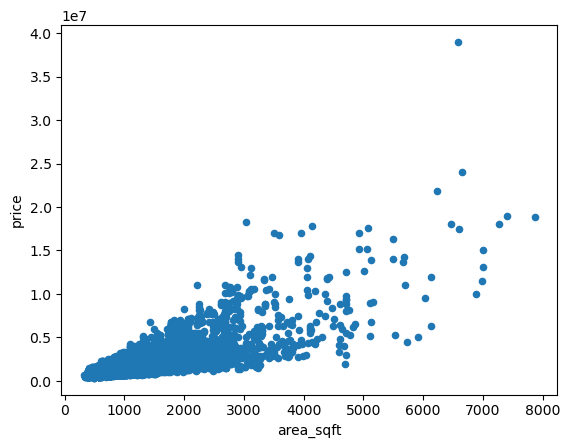

========== (7) ==========
29


In [34]:
#########################################################################################
### Your code starts here ###############################################################

""" (1)
"""
print('='*10+' (1) '+'='*10)
df_condo_facts['date_of_sale_format'] = pd.to_datetime(df_condo_facts['date_of_sale'], format='%b-%y')
display(df_condo_facts.sort_values("date_of_sale_format", ascending=True).head(1))

""" (2)
"""
print('='*10+' (2) '+'='*10)
display(df_condo_facts.groupby("type").count()["transaction_id"])

""" (3)
"""
print('='*10+' (3) '+'='*10)
display(df_condo_facts[(df_condo_facts["subzone"].str.lower()=='redhill') & (df_condo_facts["price"].astype(int) > 3000000)].shape[0])

""" (4)
"""
print('='*10+' (4) '+'='*10)
display(df_condo_facts.groupby("planning_area").count()["transaction_id"].sort_values(ascending=False)[:5])

""" (5)
"""
print('='*10+' (5) '+'='*10)
df_condo_facts['price-to-area_ratio'] = np.round(df_condo_facts['price'] / df_condo_facts['area_sqft'], 2)
display(df_condo_facts[df_condo_facts['postal_district']==11].sort_values('price-to-area_ratio', ascending=False)[['name', 'price-to-area_ratio']].head(2))

""" (6)
"""
print('='*10+' (6) '+'='*10)
fig, ax = plt.subplots()
df_condo_facts.plot.scatter(ax=ax, x='area_sqft', y='price')
plt.show()

""" (7)
"""
print('='*10+' (7) '+'='*10)
df_condo_facts[['min_floor', 'max_floor']] = df_condo_facts['floor_level'].str.replace('b', '-').str.split(' to ', -1, expand=True).astype(int)
n_above_50 = df_condo_facts[(df_condo_facts['type']=='apartment') & (df_condo_facts['min_floor']>=50) & (df_condo_facts['max_floor']<=60)].shape[0]
n_equal_50 = df_condo_facts[(df_condo_facts['type']=='apartment') & (df_condo_facts['max_floor']==50)].shape[0] // 5
print(n_above_50 + n_equal_50)
### Your code ends here #################################################################
#########################################################################################

---

## 2 Identifying Noise Using Clustering

In Section 1 we focused on addressing any "obvious" noise a given dataset may contain. Obvious noise is not well defined, but in general it's this kind of noise that can be identified by having a good look at the data or by means of a simple analysis (e.g., looking at the domains of attributes, or simple statistics such as the distribution/histogram). However, as we saw in the lecture, that some noise is much more difficult to detect. More specifically, we saw that an outlier can indeed only be identified as such when looking at the combination of different data points. Looking at individual attributes / features does not suffice here.

If you recall, an outlier refers to some record (i.e., data samples) is very different compared to many to most other records. There are different ways to address this problem, and in this section we see how we can utilize DBSCAN for this task. As the name already indicates, DBSCAN (Density-Based spatial Clustering of Applications with Noise), is a clustering algorithm that has an explicit notion of noise points, i.e., data points that are noticeable more dissimilar to data points that form clusters.

As our condo dataset contains too many non-numerical attributes, we use in this section simple datasets (i.e., small datasets containing only numerical attributes). We start with a toy dataset -- 70 records, 2 attributes -- to motivate the idea and for you to test your implementation. Limiting ourselves to 2 attributes allows also for simple visualizations.

First, let's read the toy dataset:

In [74]:
X_dbscan_toy = pd.read_csv('data/a1-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


Now we can run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset. Here we use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

In [75]:
dbscan_clustering = DBSCAN(eps=0.1, min_samples=10).fit(X_dbscan_toy)

The points that are noise points are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise as follows:

In [76]:
noise_point_indices = np.argwhere(dbscan_clustering.labels_ < 0).squeeze()

print('The indices of the points labeled as noise are: {}'.format(noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 39 43 46 51 65]


Of course, we can also plot the results. Note that the figure below only highlights the points labeled as noise in red; all points belonging to *some* clusters are in grey (note that we do not care to which exact cluster these points belong).


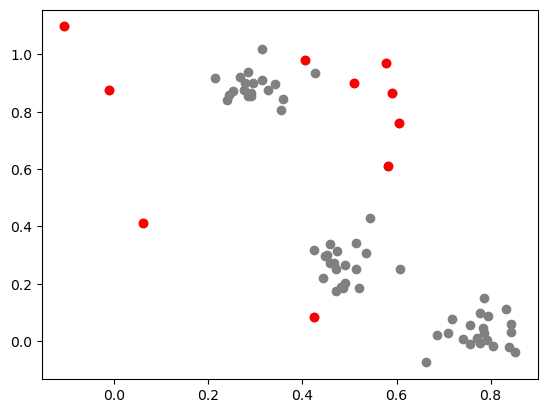

In [77]:
plt.figure()
plt.scatter(X_dbscan_toy[:,0], X_dbscan_toy[:,1], c='grey')
plt.scatter(X_dbscan_toy[noise_point_indices,0], X_dbscan_toy[noise_point_indices,1], c='red')
plt.show()

Summing up, the red dots in the plots we define as noise or outliers as they are very dissimilar to the other data points. In practice, we would likely remove those noise points, treat them separately, or maybe perform additional preprocessing steps to potentially "denoise" the dataset. However, the steps of choice generally depend heavily on the exact data mining task. Here, we focus on the identification of noise points.

### 2.1 Implementing DBSCAN for Noise Detection (10 Points)

In the lecture, we covered the original algorithm of DBSCAN, which you can also find on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN). While not difficult to implement, it takes quite a couple of lines of codes to do so. For this assignment, however, we are only interested in the points of a dataset that DBSCAN considers noise (as illustrated above; the red dots in the previous plot). This includes that we do not have to care about

* how many clusters there are (the plot above hints at 3 clusters but it does not matter) *and*
* which non-noise points (the grey dots in the plot above) belong to which cluster

**Your task is to implement a modified/simplified version of DBSCAN to find all noise points in a dataset!** The skeleton of method `get_noise_dbscan()` you need to complete is found in the file `A1a_script.py` (before the apprpriate renaming). The method takes data matrix `X` as well as the two basic parameters `eps` and `min_samples` as input parameters; we use the same naming as scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  The output should be 2 lists of indices: (a) one containing the indices of all *core points* and (b) on containing the indices of all *noise points* in input dataset X.

**Important:**
* We only split this task into 2.1 a) and 2.1 b) to have intermediate results you can check for correctness (and potentially to better allow for partial marking). Our reference solutions first finds all core points and uses this information to find all noise points; hence the 2 separate code blocks for you to complete.
* However, if you have a better/faster/shorter/cooler/etc. solution, you are more than welcome to implement it and ignore the intermediate result of finding all core points. Only the result from 2.1 b) is important. This also means that you can ignore 2.1 a) and still get full marks if you correctly identify all noise points.
* If you have an alternative solution, please make sure that the method still returns the 2 output parameters `(core_point_indices, noise_point_indices)`. If you do not need to explicitly identify the core points, you can simply return `None` for `core_point_indices`.
* You can import any method `numpy`, `scipy`, `sklearn`, or `pandas` has to offer -- except for any ready-made implementation of DBSCAN, of course :). Please add any imports to the code cell at the top with the other imports. Hint: We already imported [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) for you.

**Little competition:** As we expect different implementations here -- and we do not think our solution to be that great anyway :) -- we will run a little competition: We will run each solution against a large(r) dataset and measure the runtime of each solution to get a ranking who's implementation runs fastest. Please note that this ranking is purely bragging rights and will not affect the marks! It's just for a little more incentive.

#### 2.1 a) Compute Core Points (5 Points)

As mentioned above, our reference solution first computes all core points. If you follow this approach, complete the respective part in the code of method `get_noise_dbscan()`. Some hints:
* Recall that we do not care to which cluster a core point a data sample belongs, only that is a core point in *some* cluster
* Have a look at method [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html); it might make your life easier.

**Important:** Avoid using loops in the parts of the code you have to complete. If you use loops but the results are correct, there will be some minor deduction of points. Once you know what you need to do, it is almost guaranteed that `numpy`, `scipy`, or `sklearn` will provide a useful method.

In [116]:
from A1a_mayuan_e0674520 import get_noise_dbscan
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
my_core_point_indices, _ = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of core points: {}\n'.format(len(my_core_point_indices)))
print('The first 25 indices of the points labeled as core points:\n{}'.format(sorted(my_core_point_indices)[:20]))

Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]


The output of previous code cell should look like:
    
```
Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
```

Note that `0`, `4`, and `27` are missing from this list since [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) told us that these points are noise.

#### 2.2 b) Compute Noise Points (5 Points)

Knowing the core points is useful but only an intermediate step. Now it is time to complete the method `get_noise_dbscan()` to compute the indices of all noise points in `X`. Again, our reference solution uses `core_point_indices` to accomplish this. If your implementation does not require the information about core points but returns the correct `noise_point_indices` then this is perfectly fine!

**Important:** Avoid using loops in the parts of the code you have to complete. If you use loops but the results are correct, there will be some minor deduction of points. Once you know what you need to do, it is almost guaranteed that `numpy`, `scipy`, or `sklearn` will provide a useful method.

In [118]:
_, my_noise_point_indices = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of noise points: {}\n'.format(len(my_noise_point_indices)))
print('The indices of all points labeled as noise points:\n{}'.format(sorted(my_noise_point_indices)))

Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]


The output of previous code cell should look like:

```
Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]
```

Since we used the same values for `eps` and `min_samples`, this result matches the output we saw earlier when we used scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over the toy dataset.

**Additional tests (nothing of you to do here).** With the code cell below, you can further test your implementation. It uses the popular [IRIS Dataset](https://archive.ics.uci.edu/ml/datasets/iris). It contains 150 data points with 4 numerical features. The code cell extracts the noise points using the DBSCAN implementation of scitkit-learn as well as your own implementation. The two results should always match for the same values of `eps` and `min_samples` for the given examples. There is nothing for you to implement here!

In [35]:
X_iris = pd.read_csv('data/a1-iris.csv')[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

eps, min_samples = 0.6, 6
# eps, min_samples = 0.5, 8
# eps, min_samples = 0.4, 5

sk_clustering_iris = DBSCAN(eps=eps, min_samples=min_samples).fit(X_iris)
sk_noise_iris = np.argwhere(sk_clustering_iris.labels_ < 0).squeeze()

_, my_noise_iris = get_noise_dbscan(X_iris, eps=eps, min_samples=min_samples)

print('sklearn solution: {}'.format(sk_noise_iris))
print('My own solution:  {}'.format(my_noise_iris))

sklearn solution: [ 41  57  60  93  98 106 109 117 118 122 131]
My own solution:  [ 41  57  60  93  98 106 109 117 118 122 131]


### 2.2 Questions about DBSCAN

#### 2.2 a) `get_noise_dbscan()` vs. `sklearn.cluster.DBSCAN` (2 Points)

Above, we used scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to check the correctness of your implementation of `get_noise_dbscan()` and for the given example parameters (e.g., `eps, min_samples = 0.6, 6`) the results should indeed be identical. 

Now try `eps, min_samples = 0.3, 3` and compare the result; use the code cell below:

In [43]:
eps, min_samples = 0.3, 3

sk_clustering_iris = DBSCAN(eps=eps, min_samples=min_samples).fit(X_iris)
sk_noise_iris = np.argwhere(sk_clustering_iris.labels_ < 0).squeeze()

_ , my_noise_iris = get_noise_dbscan(X_iris, eps=eps, min_samples=min_samples)

print('sklearn solution: {}'.format(sk_noise_iris))
print('My own solution:  {}'.format(my_noise_iris))

sklearn solution: [  5  14  15  16  18  20  22  31  32  33  41  44  51  55  56  57  59  60
  61  62  64  66  68  71  72  76  77  79  83  84  85  87  93  98 100 102
 104 105 106 107 108 109 110 111 112 114 115 117 118 119 121 122 125 128
 129 130 131 132 133 134 135 136 139 141 145 147 148]
My own solution:  [  5  14  15  16  18  22  32  33  41  44  51  56  57  59  60  62  64  68
  71  72  76  77  79  83  85  87  93  98 100 102 105 106 107 108 109 110
 111 112 114 117 118 119 121 122 125 129 130 131 133 134 135 139 141 145
 147]


In [44]:
np.argwhere(sk_clustering_iris.labels_ >= min_samples).squeeze()

array([ 53,  63,  67,  69,  70,  73,  78,  80,  81,  82,  88,  89,  90,
        91,  92,  94,  95,  96,  99, 101, 103, 113, 116, 120, 123, 124,
       126, 127, 137, 138, 140, 142, 143, 144, 146, 149], dtype=int64)

In [45]:
core

array([  0,   1,   2,   3,   4,   6,   7,   9,  10,  11,  12,  17,  19,
        21,  23,  25,  26,  27,  28,  29,  30,  31,  34,  37,  38,  39,
        40,  42,  43,  45,  46,  47,  48,  49,  52,  53,  58,  63,  66,
        67,  69,  73,  74,  75,  78,  80,  81,  82,  88,  89,  91,  92,
        94,  95,  96,  99, 101, 103, 113, 116, 120, 123, 126, 127, 132,
       137, 138, 140, 142, 144, 148], dtype=int64)

**Explain why you see different results for some values for `eps` and `min_samples`?** Even if you think that your implementation of method `get_noise_dbscan()` might contain little errors, you can simply assume here that it is correct and that the results would match the one of `sklearn.cluster.DBSCAN` for the examples in previous code cell (e.g. `eps, min_samples = 0.6, 6`).

Hint: Recall from the lecture that DBSCAN is deterministic with respect to the core points and the noise points; only the border points might differ in some cases. However, this statement relies on an assumption that does not (completely) hold on this IRIS dataset.

**Your Answer:**

euclidean distance implies the similarity of 2 points, higher the dimensions the closer similarity of 2 points. so IRIS data is 4D dataset which could increase the probability of samples has more neighbors which highly chance to be a core points, that may reduce the number of noise

**2.2 b) Basic Data Understanding with DBSCAN (3 Points)**

Assume you have a dataset `X`, run DBSCAN, and get a clustering that contains a set of clusters and some noise points (there's no need to be more precise; it's only important that you don't get just noise). Let's also assume you create a new dataset `X_new` simply by shuffling `X`; no other changes. Now you run DBSCAN with the same parameters as before over `X_new` and get a different clustering, i.e., most of the clusters are not exactly the same as before.

**Describe what this information tells about the dataset and clustering!** This may include a brief discussion how changing the parameters of DBSCAN will likely affect the results.

**Your Answer:**

The border points could be reachable by different clusters if they are not dense. the dataset may has distinct clusters but close to each other with some shared transition border points. the scan order could change the belongings of border points to which core points.

#### 2.2 c) Effects of Data Manipulation on DBSCAN Results (2 Points)

Assume you have a $d$-dimensional dataset `X` in the Euclidean space, i.e., each data point as $d$ numerical features (with each feature value in the interval $[0, 1]$). After running DBSCAN over `X`, you get some clustering (again, we only assume it's not only noise). Now you create a new dataset `X_new` by multiplying all data points by 10 afterwards adding 100 to all data points (in Python, assuming X is a NumPy array this can simply be done by `X_new = X * 10 + 100`). Now you can run DBSCAN over `X_new`.

**Explain how you have to change the parameters of DBSCAN for `X_new` to get the same clusters as for `X`!**. You can ignore any corner cases related to 2.2 a).

**Your Answer:**

1. if Euclidean distance is used, 
   
   d = ||X - X'||_2
   => d_new = ||(10 * X + 100)^2 - (10 * X' + 100)^2||_2
   => d_new  = 10 * d
2. DB scan based on the density = min_pts/epsilon
3. Since the original distance is expended 10 time, to remain the same result, either shrink the min_pts by 10 or increase the radius epsilon by 10 times 

`epsilon_new = epsilon * 10 (or min_pts_new = min_pts / 10 but has risk of integer)`
   

#### 2.2 d) Identifying Noise/Outliers with Clustering beyond DBSCAN (3 Points)

Apart from DBSCAN, we also covered two other important clustering algorithms: K-Means and AGNES (Agglomerative Nesting). For all three clustering algorithms we looked in detail into their approach, and also discussed the individual strengths, weaknesses, and limitations. Particularly we saw that of these three algorithms, only DBSCAN has this explicit notion of noise points. But what about K-Means and AGNES?

**Explain if K-Means and/or AGNES can potentially be utilized to identify noise/outliers in a dataset!** If your answer for an algorithm is "No", please provide a brief justification. If your answer for an algorithm is "Yes", provide a brief sketch (no pseudo code required; a basic description will do) how to use the algorithm for noise/outlier detection.

**Your Answer:**

1. For K-Means, we can introduce hyperparameter Min_pt, epsilon which similar to DBscan. During fitting we rank the points by its number of neighbors that enclosed by given epsilon Euclidean distance circle/sphere. If points less than Min_pt, they are consider as outlier
2. For AGNES, introduce Min_pt only. for the clusters whose size is less than Min_pt are considered as outlier